Create the basic epsilon-greedy agent.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

NUM_OF_ARMS = 10

class TenArmedBandit:
    def __init__(self):
        self.reward = np.random.randn(NUM_OF_ARMS)
        self.optimal_action = np.argmax(self.reward)
    
    def step(self, action):
        return self.reward[action] + np.random.randn()

class EpsilonGreedyAgent:
    def __init__(self, epsilon=0):
        self.action_rewards = np.zeros(NUM_OF_ARMS)
        self.action_counts = np.zeros(NUM_OF_ARMS)
        self.epsilon = epsilon
    
    def action_value(self):
        return np.where(self.action_counts, self.action_rewards / self.action_counts, 0)
    
    def act(self):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(np.arange(NUM_OF_ARMS))
        else:
            action = np.argmax(self.action_value())
        return action
    
    def learn(self, action, reward):
        self.action_rewards[action] += reward
        self.action_counts[action] += 1


Prepare data for Figure 2.2

In [2]:
from joblib import Parallel, delayed
from functools import partial

def single_run(agents, max_steps):
    received_rewards = np.zeros((len(agents), max_steps))
    is_action_optimal = np.zeros_like(received_rewards)
    agents = [EpsilonGreedyAgent(epsilon=epsilon) for epsilon in epsilons]
    for i, agent in enumerate(agents):
        env = TenArmedBandit()
        for step in np.arange(max_steps):
            action = agent.act()
            reward = env.step(action)
            agent.learn(action, reward)
            received_rewards[i, step] = reward
            is_action_optimal[i, step] = (action == env.optimal_action)
    return received_rewards, is_action_optimal

epsilons = [0, 0.01, 0.1]
agents = [EpsilonGreedyAgent(epsilon=epsilon) for epsilon in epsilons]
results = Parallel(n_jobs=6)(delayed(partial(single_run, agents=agents, max_steps=1000))() for _ in range(2000))
received_rewards = np.asarray([result[0] for result in results]) 
is_action_optimal = np.asarray([result[1] for result in results]) 

/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/1744925012.py:24: RuntimeWarning: invalid value encountered in divide
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipyker

Generate Figure 2.2

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/945310245.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(averaged_received_rewards[i], label=f'$\epsilon = {epsilon}$')
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_79389/945310245.py:14: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(averaged_is_action_optimal[i], label=f'$\epsilon = {epsilon}$')


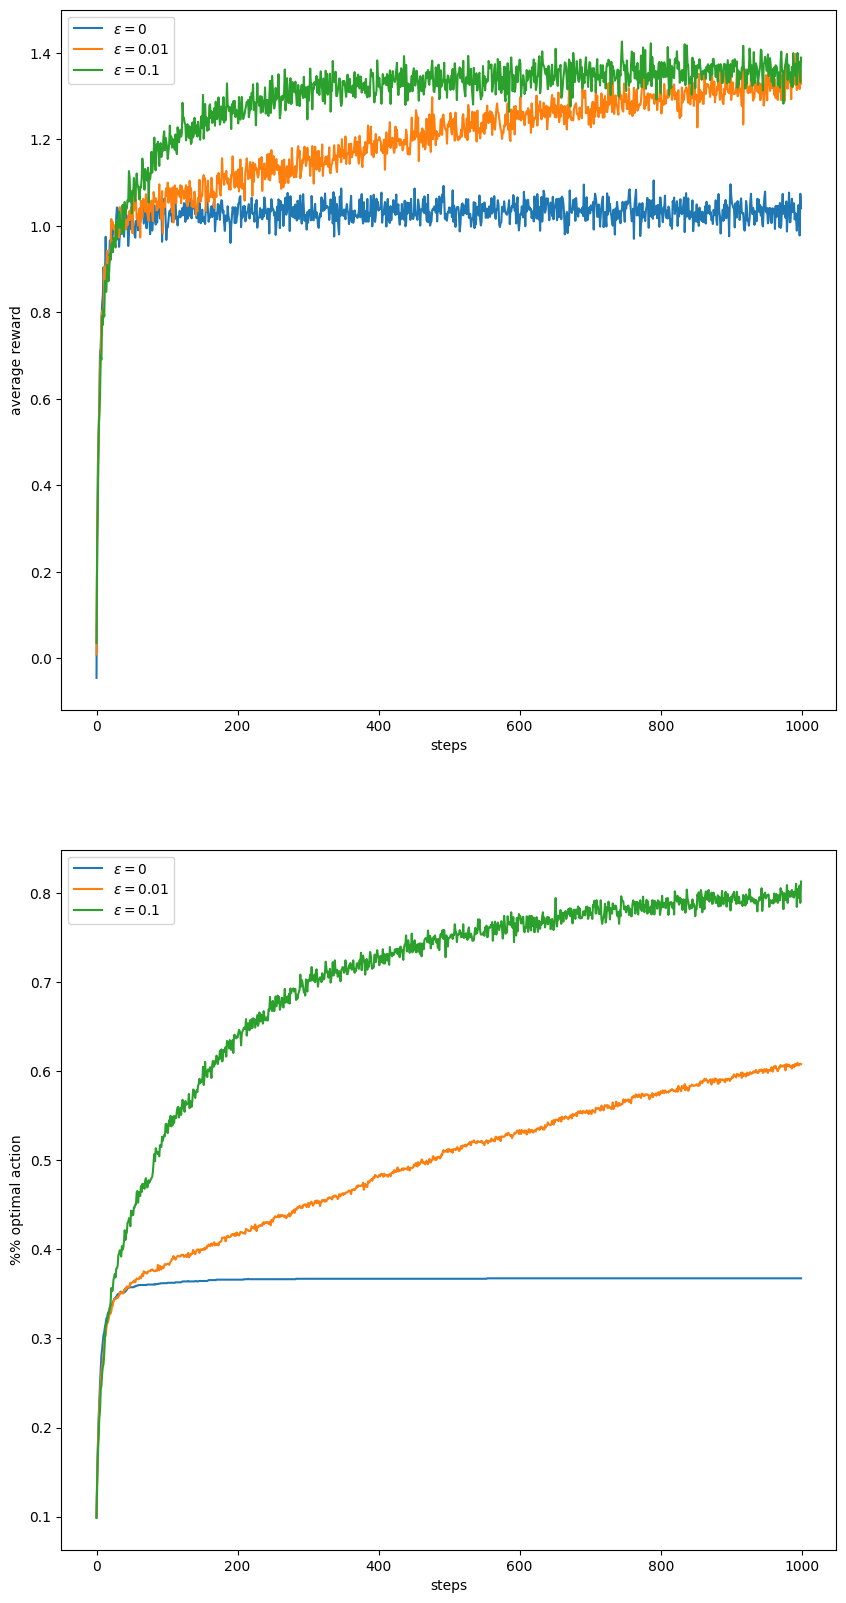

In [3]:
averaged_received_rewards = np.mean(received_rewards, axis=0)
averaged_is_action_optimal = np.mean(is_action_optimal, axis=0)

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1) 
for i, epsilon in enumerate(epsilons):
    plt.plot(averaged_received_rewards[i], label=f'$\epsilon = {epsilon}$')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()
plt.subplot(2, 1, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(averaged_is_action_optimal[i], label=f'$\epsilon = {epsilon}$')
plt.xlabel('steps')
plt.ylabel('%% optimal action')
plt.legend()
plt.show()